In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [4]:
df_can = pd.read_excel('./data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [7]:
df_can.columns.values
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
df_can.drop(['Type','Coverage','AREA','REG','DEV','DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df_can.set_index('Country',inplace=True)
df_can.index.name = None
df_can.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [16]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,30


In [20]:
df_can.sort_values(ascending=False, axis=0, by='Total', inplace=True)
df_can.head()
#df_can.columns.values

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [21]:
df_top5 = df_can.head(5)
years = range(1980,2013)
df_top5 = df_top5[years].transpose()

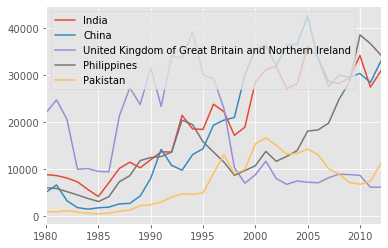

In [25]:
df_top5.plot(kind='line')
plt.show()

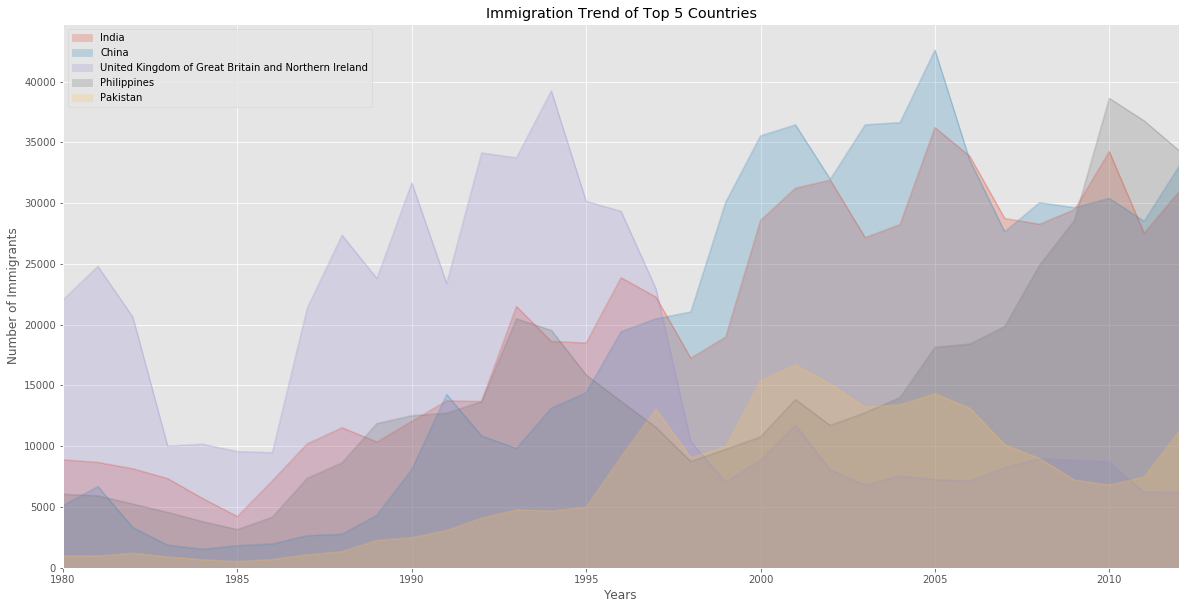

In [28]:
df_top5.plot(kind='area', 
             stacked=False,
             alpha=0.25,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()